## Ejercicio 7

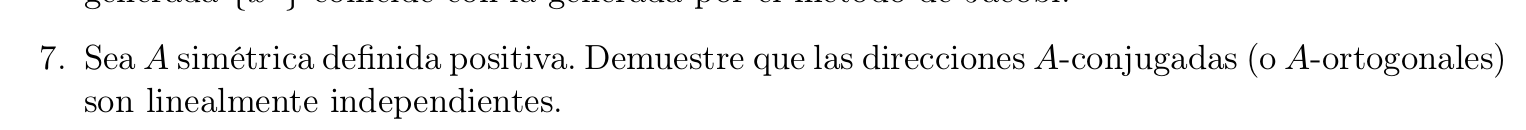

Tengo $\{ d^i \}_{i \in \{1, ..., n\}}$ direcciones A-conjugadas.

$ (d^i)^T A d^j = 0 $ si $i \neq j$

Supongo  $\exists \{ c_i \}$ tal que $ \sum_{i=0}^n c_i d^i = 0 \implies A (\sum_{i=0}^n c_i d^i) = 0 $

Ahora, tomo $d^j$ y lo paso por el producto interno de $A$

$ (d^j)^T A (\sum_{i=0}^n c_i d^i) = c_j (d^j)^T A d^j = 0$, pero $(d^j)^T A d^j \neq 0 $.

Luego, $c_j = 0$ para cualquier $j$.

##Ejercicio 9:

Supongamos que pasamos el $U \in \mathbb{R}^{m \times n}$ a un $u \in \mathbb{R}^{mn}$ siguiendo el esquema dado por el orden 1

Si tomamos el punto $k = 5$ en la matriz $3 \times 3$, le corresponde $i = 2$ y $j = 2$, más generalmente sería $i = |k / n| + 1$ y $j = k (mod\text{ n})$

Con este nuevo orden, tomemos cualquier $k$ y revisemos la fórmula

$ -\frac{U_{i+1, j} - 2U_{i,j} + U_{i-1, j}}{h^2} - \frac{U_{i, j+1} - 2U_{i,j} + U_{i, j-1}}{h^2} = -\frac{u_{k+n} - 2u_{k} + u_{k-n}}{h^2} - \frac{u_{k+1} - 2u_{k} + u_{k-1}}{h^2} = 0$ 

Teniendo en cuenta esto, formamos la matriz dispersa siguiendo las instrucciones del Scipy Sparse: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix.

In [1]:
import numpy as np
from scipy.sparse import csr_matrix

def trans_aux(k, m):
    i = k // m
    j = k % m
    return i, j


def calor(n):
    aes = []
    ies = []
    jes = []
    b = np.zeros((n-2)**2)
    h = 1 / (n-1)

    for k in range((n-2)**2):
        i, j = trans_aux(k, n-2)
        # Condición de borde izquierdo = 100
        if j == 0:
            b[k] = 100
        # Elemento (k,k) -> (i,j) x (i,j) = 4
        aes.append(4)
        ies.append(k)
        jes.append(k)

        if i != 0:
            # Si no estoy en el borde superior, puedo restar el elemento de arriba
            aes.append(-1)
            ies.append(k)
            jes.append(k - (n-2))

        if i != n-3:
            # Si no estoy en el borde inferior, puedo restar el elemento de abajo
            aes.append(-1)
            ies.append(k)
            jes.append(k + (n-2))

        if j != 0:
            # Si no estoy en el borde izquierdo, puedo restar el elemento de la izquierda
            aes.append(-1)
            ies.append(k)
            jes.append(k-1)

        if j != n-3:
            # Si no estoy en el borde derecho, puedo restar el elemento de la derecha
            aes.append(-1)
            ies.append(k)
            jes.append(k+1)

    # Puedo dividir por h^2 para completar el ejercicio (no es tan necesario)
    aes = np.array(aes) / h**2
    b = np.array(b) / h**2

    # Genero la matriz dispersa a partir de los datos y sus índices
    A = csr_matrix((aes, (ies, jes)), shape=((n-2)**2, (n-2)**2))

    return A, b


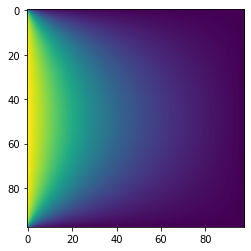

In [2]:
# Resuelvo y grafico (pueden usar alguno de los métodos que crearon para resolver)
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve

A, b = calor(100)
x = spsolve(A, b)

# Reordenamos los datos al orden k -> i,j
u = x.reshape(98, 98)
plt.imshow(u)